# Quickstart Guide

Congratulations on successfully installing Sequenzo! 🎉 You're now ready to explore social sequence analysis with ease.

In this guide, we'll walk you through analyzing country-level CO₂ emissions sequences step by step. If you're curious about how we transformed the original dataset into a format suitable for sequence analysis, you can find the detailed explanation here (TODO: webpage on SequenzoWebsite).

New to Python? No worries! We've designed Sequenzo to be intuitive and beginner-friendly, so you can jump right in regardless of whether you are a newbie or a seasoned Python coder. 

By the end of this tutorial, you'll learn how to:

1. Install Sequenzo
2. Load and explore a dataset
3. Analyze social sequences
4. Visualize the results

Now, let's get started on this exciting journey! 🐍✨


## 1. Get a rough idea of the data

In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
# Now access functions using the alias:
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
df = load_dataset('country_co2_emissions')

# Show the dataframe
df

Available datasets in Sequenzo:  ['chinese_colonial_territories', 'country_gdp_per_capita', 'country_co2_emissions']


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low
1,Albania,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
2,Algeria,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
3,Andorra,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
4,Angola,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,High,High,High,High,High,High,High,High,High,...,High,High,High,Middle,Middle,Middle,Low,Low,Low,Low
189,Vietnam,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,Low,Low,Low,Low,Low,Middle,Middle,Middle,Middle,Middle
190,Yemen,High,High,High,High,High,High,High,High,High,...,Low,Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low
191,Zambia,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low


The classification is based on all years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

If we take Andorra as an example:  

In [6]:
# Filter the data for Andorra
andorra_df = df[df['country'] == 'Andorra']

# Show the Andorra df
andorra_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Andorra,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High


Based on the outcome, which is a subset of the original dataset, we can see that Andorra's CO₂ emissions per capita have undergone the following changes over the years:

* 1990-1991: Started at "Very High" levels, indicating emissions in the top 20% of all countries
* 1992-1997: Dropped to "High" level (60-80th percentile)
* 1998: Brief return to "Very High" level
* 2000s onwards: Stabilized at "High" level (60-80th percentile) and maintained this classification through 2019

But it comes with a question: What if we want to analyze the sequences of all countries? 🤔 

Here we need Sequenzo to help us!

## 2. Analyze Social Sequences with Sequenzo

In [2]:
# Create a SequenceData object

# Define the time-span variable
time_list = list(df.columns)[1:]

states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

# TODO: write a try and error: if no such a parameter, then ask to pass the right ones
# sequence_data = SequenceData(df, time=time, time_type="year", id_col="country", ids=df['country'].values, states=states)

sequence_data = SequenceData(df, time=time_list, time_type="year", id_col="country", states=states)

sequence_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 193
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


SequenceData(193 sequences, Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High'])

Now we have successfully created the `SequenceData` object based on our original dataframe, which is the core object in Sequenzo for analyzing social sequences.

With our naked eyes, we might be only able to see the sequences of one country at a time. However, with the help of Sequenzo, we can analyze all the sequences of countries in one go. The most important tool is **visualization**, which helps us to understand the patterns and trends in the data.

## Visualization

Among the various visualization methods, the most commonly used one is the **index plot**. Let's see how it works.

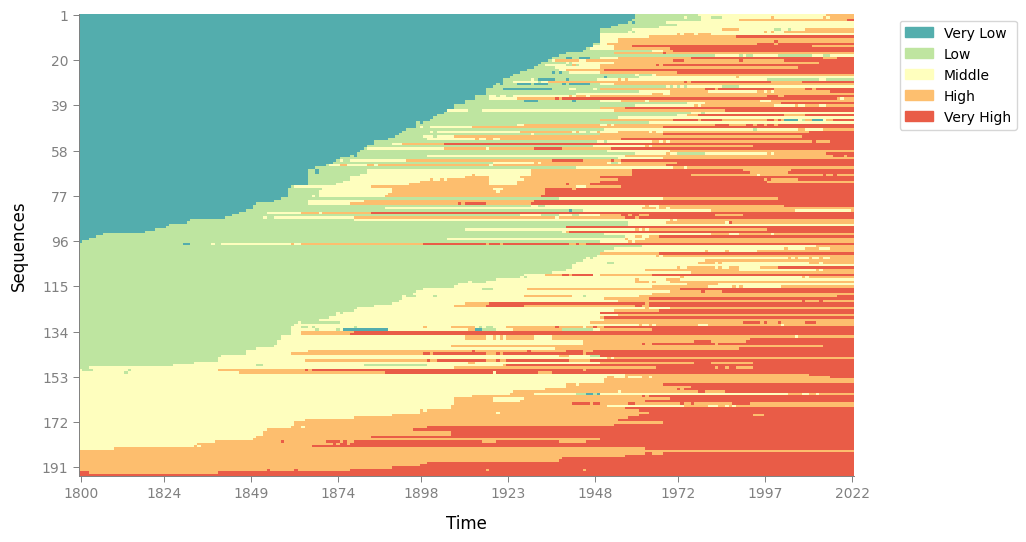

In [4]:
# Plot the index plot
# TODO: The same for dealing with unexpected parameters here. TypeError: plot_sequence_index() got an unexpected keyword argument 'sortv'

plot_sequence_index(sequence_data, save_as='index_plot')

But what if we would like to know more? state distribution plot. 

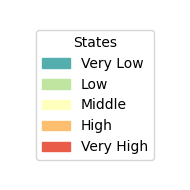

In [5]:
sequence_data.plot_legend()

In [6]:
print(sequence_data.alphabet)
print(sequence_data.states)
print(sequence_data.color_map)

['Very Low', 'Low', 'Middle', 'High', 'Very High']
['Very Low', 'Low', 'Middle', 'High', 'Very High']
{'Very Low': (0.3280276816608997, 0.6805074971164936, 0.6802768166089965), 'Low': (0.7477124183006538, 0.8980392156862746, 0.6274509803921569), 'Middle': (0.998077662437524, 0.9992310649750096, 0.7460207612456747), 'High': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587), 'Very High': (0.9139561707035756, 0.36239907727797, 0.27935409457900806)}


In [7]:
sequence_data.state_mapping

{'Very Low': 1, 'Low': 2, 'Middle': 3, 'High': 4, 'Very High': 5}

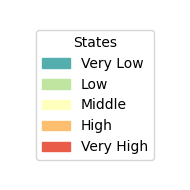

In [8]:
sequence_data.plot_legend()

In [9]:
sequence_data.get_legend

<bound method SequenceData.get_legend of SequenceData(194 sequences, Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High'])>

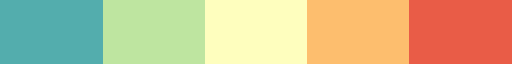

In [10]:
sequence_data.get_colormap()

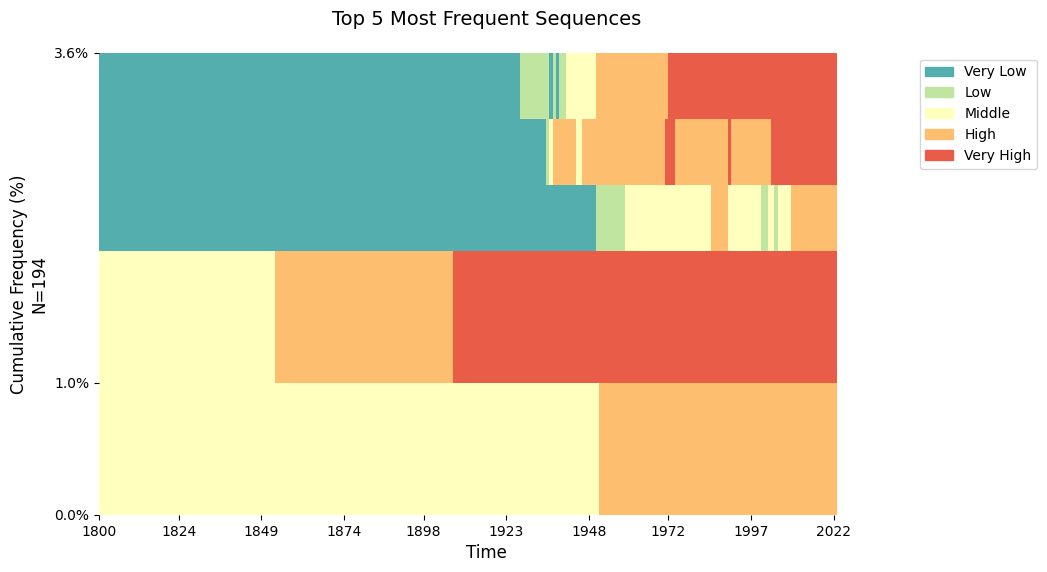

In [12]:
plot_most_frequent_sequences(sequence_data, save_as='test', top_n=5)

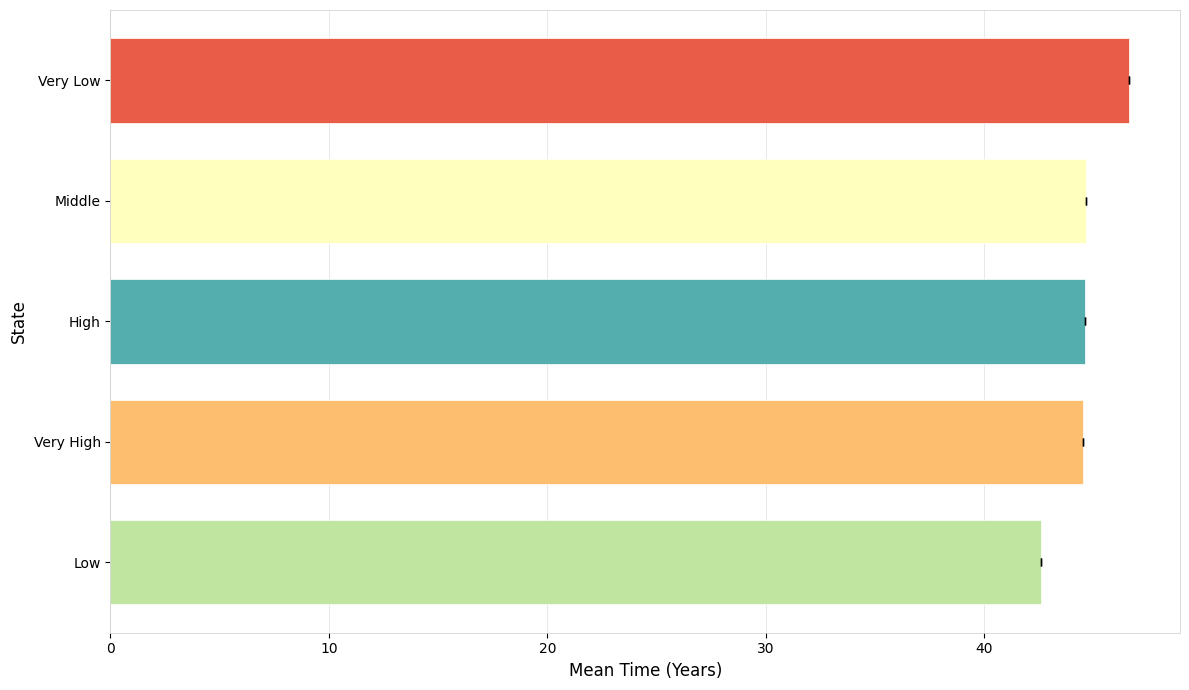

In [6]:
from sequenzo.visualization import plot_mean_time

plot_mean_time(sequence_data, save_as='mean_time')

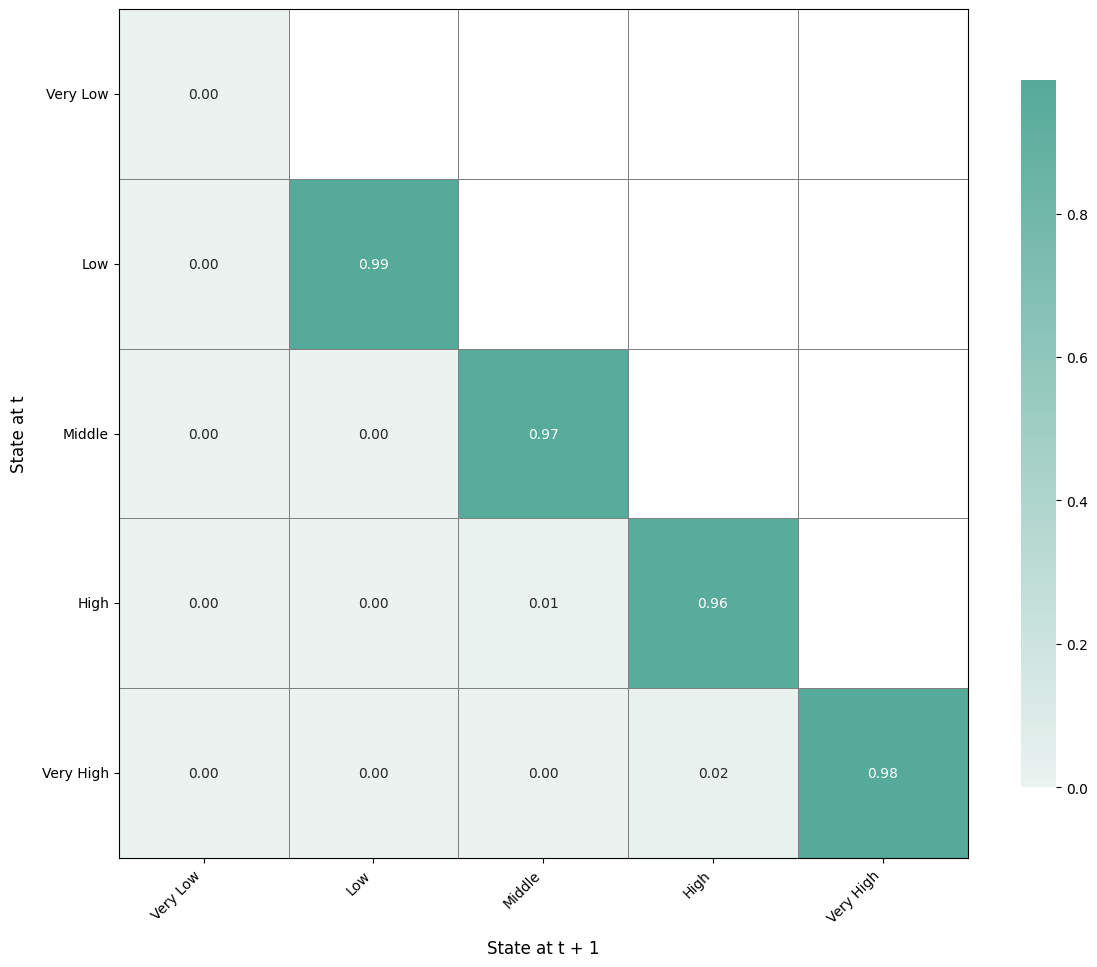

In [6]:
from sequenzo.visualization import plot_transition_matrix

plot_transition_matrix(sequence_data, save_as='transition_matrix')


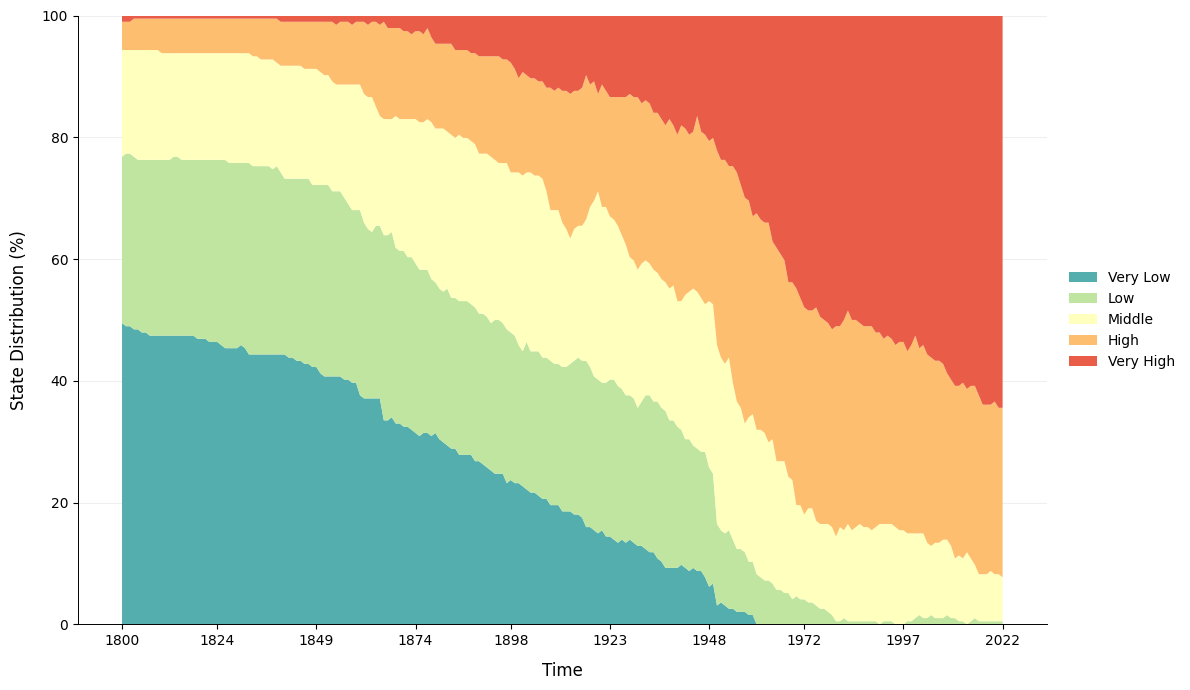

In [5]:
from sequenzo.visualization import plot_state_distribution

plot_state_distribution(sequence_data, save_as='state_distribution')

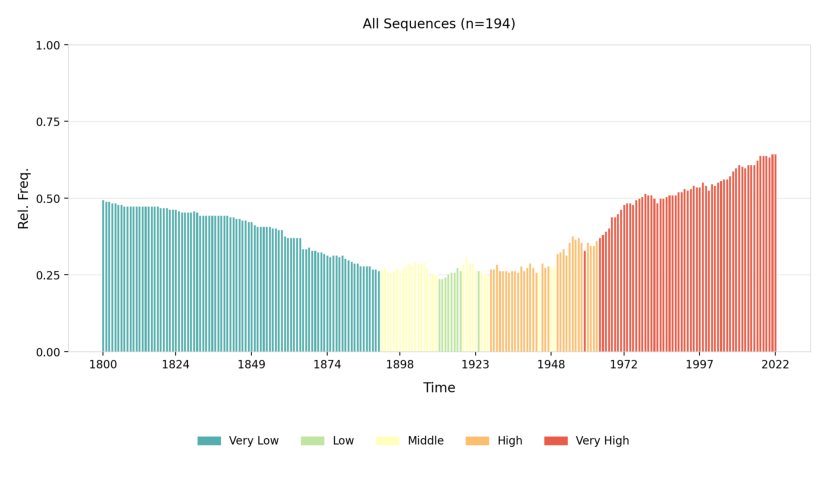

In [7]:
from sequenzo.visualization import plot_modal_state

plot_modal_state(sequence_data, save_as='modal_state')

## Dissimilarity Measures

In [3]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=sequence_data,
                         method='OM',
                         sm="TRATE",
                         indel="auto")
om

[!] cpu_affinity() not supported on this platform. Skipping...
[>] Processing 193 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 175 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,151.094678,385.142326,446.000000,113.604016,443.712870,445.994660,324.812048,442.950901,445.999644,...,446.000000,446.000000,445.994304,265.525100,308.819210,437.852189,264.911044,322.779050,59.604016,305.921084
Albania,151.094678,0.000000,271.241177,445.992253,80.361601,310.618192,443.334344,242.349051,399.581344,445.815059,...,445.992253,445.992253,442.448375,210.000862,381.210694,429.807482,299.723092,319.760787,133.285272,310.856435
Algeria,385.142326,271.241177,0.000000,443.618181,343.441483,179.526558,355.403649,152.943244,383.899006,437.738122,...,443.618181,443.618181,325.996184,267.665222,379.657760,317.791727,269.808167,198.690426,385.332920,261.998761
Andorra,446.000000,445.992253,443.618181,0.000000,445.996068,442.749561,88.225170,444.451638,59.721371,5.881678,...,0.000000,0.000000,117.633560,445.914643,446.000000,198.292230,445.989940,443.547394,446.000000,445.989477
Angola,113.604016,80.361601,343.441483,445.996068,0.000000,375.141088,443.986566,283.144204,399.585160,445.818875,...,445.996068,445.996068,443.984786,207.033965,320.717098,430.159835,267.200780,295.094678,99.472021,295.094678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,437.852189,429.807482,317.791727,198.292230,430.159835,281.289837,133.613307,350.744276,184.232973,192.647543,...,198.292230,198.292230,134.204917,424.858818,437.845900,0.000000,427.322980,306.106116,437.852664,426.792019
Vietnam,264.911044,299.723092,269.808167,445.989940,267.200780,269.422470,443.332032,264.488181,399.585160,445.812746,...,445.989940,445.989940,442.446062,248.808641,253.062609,427.322980,0.000000,177.424519,294.944043,151.189975
Yemen,322.779050,319.760787,198.690426,443.547394,295.094678,315.563463,355.329509,283.857054,401.534274,437.665716,...,443.547394,443.547394,325.921119,267.636039,264.694983,306.106116,177.424519,0.000000,322.779050,140.045965
Zambia,59.604016,133.285272,385.332920,446.000000,99.472021,443.903464,445.994779,332.680054,442.950901,445.999644,...,446.000000,446.000000,445.994779,271.393106,324.687216,437.852664,294.944043,322.779050,0.000000,321.657095


## Cluster Analysis

[>] Converting DataFrame to NumPy array...


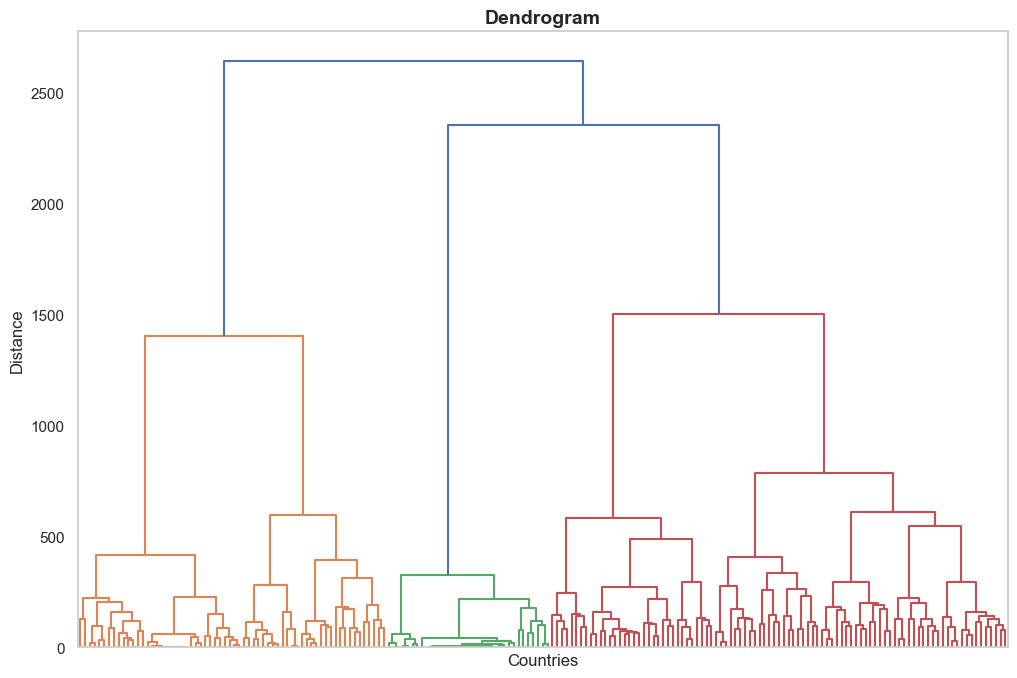

In [4]:
cluster = Cluster(om, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")


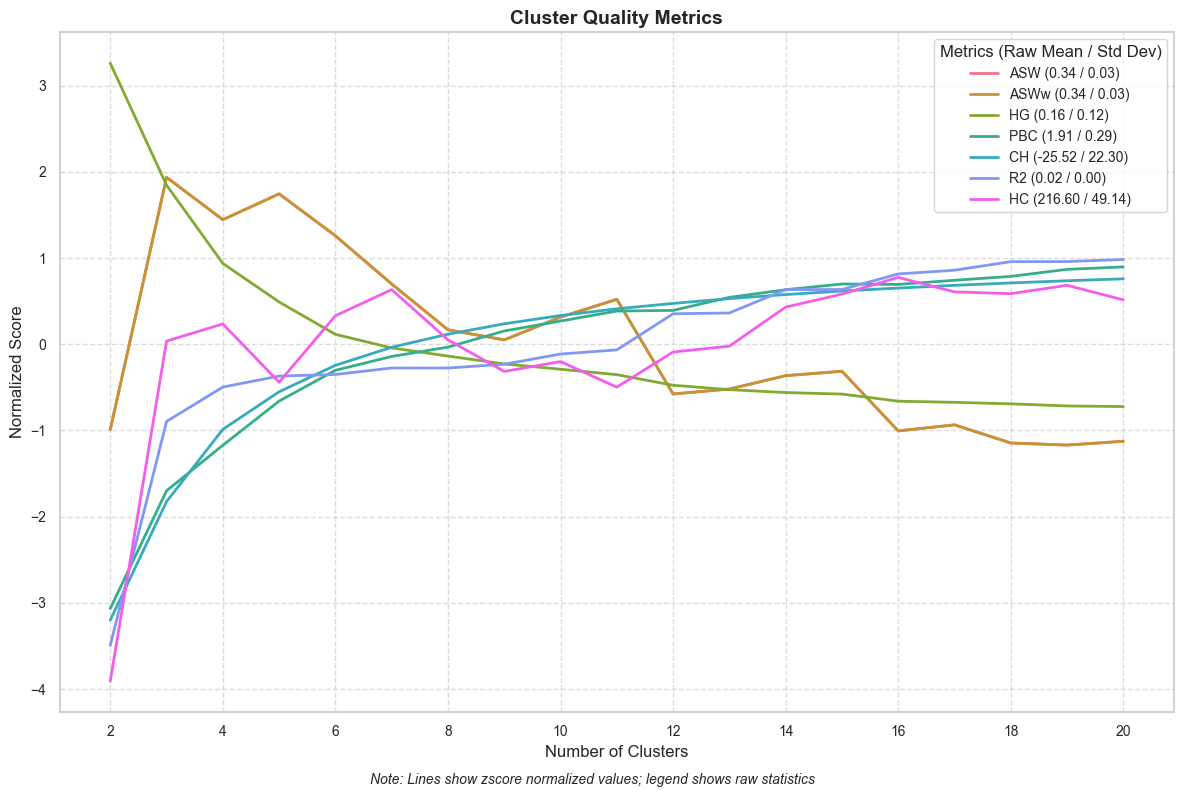

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    1.936894       1.936894            1.0
1   ASWw              3    1.936894       1.936894            1.0
2     HG              2    3.260226       3.260226            1.0
3    PBC             20    0.897869       0.897869            1.0
4     CH             20    0.759389       0.759389            1.0
5     R2             20    0.983573       0.983573            1.0
6     HC             16    0.775645       0.775645            1.0


In [5]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

       Entity ID  Cluster ID
0    Afghanistan           1
1        Albania           1
2        Algeria           5
3        Andorra           3
4         Angola           1
..           ...         ...
188    Venezuela           4
189      Vietnam           5
190        Yemen           5
191       Zambia           1
192     Zimbabwe           5

[193 rows x 2 columns]
   Cluster  Count  Percentage
0        1     34       17.62
1        2     30       15.54
2        3     34       17.62
3        4     34       17.62
4        5     61       31.61


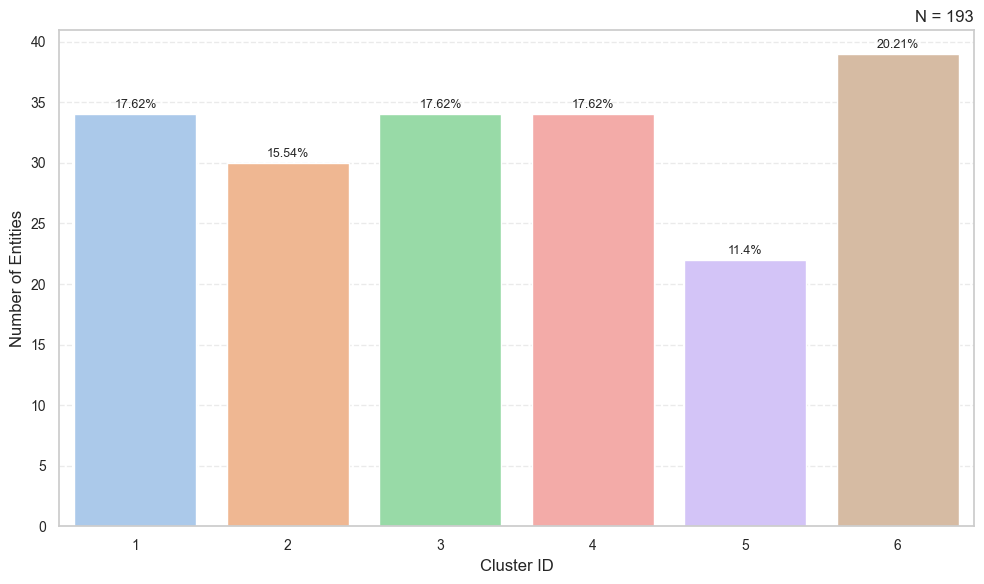

In [6]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=5)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=5)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)


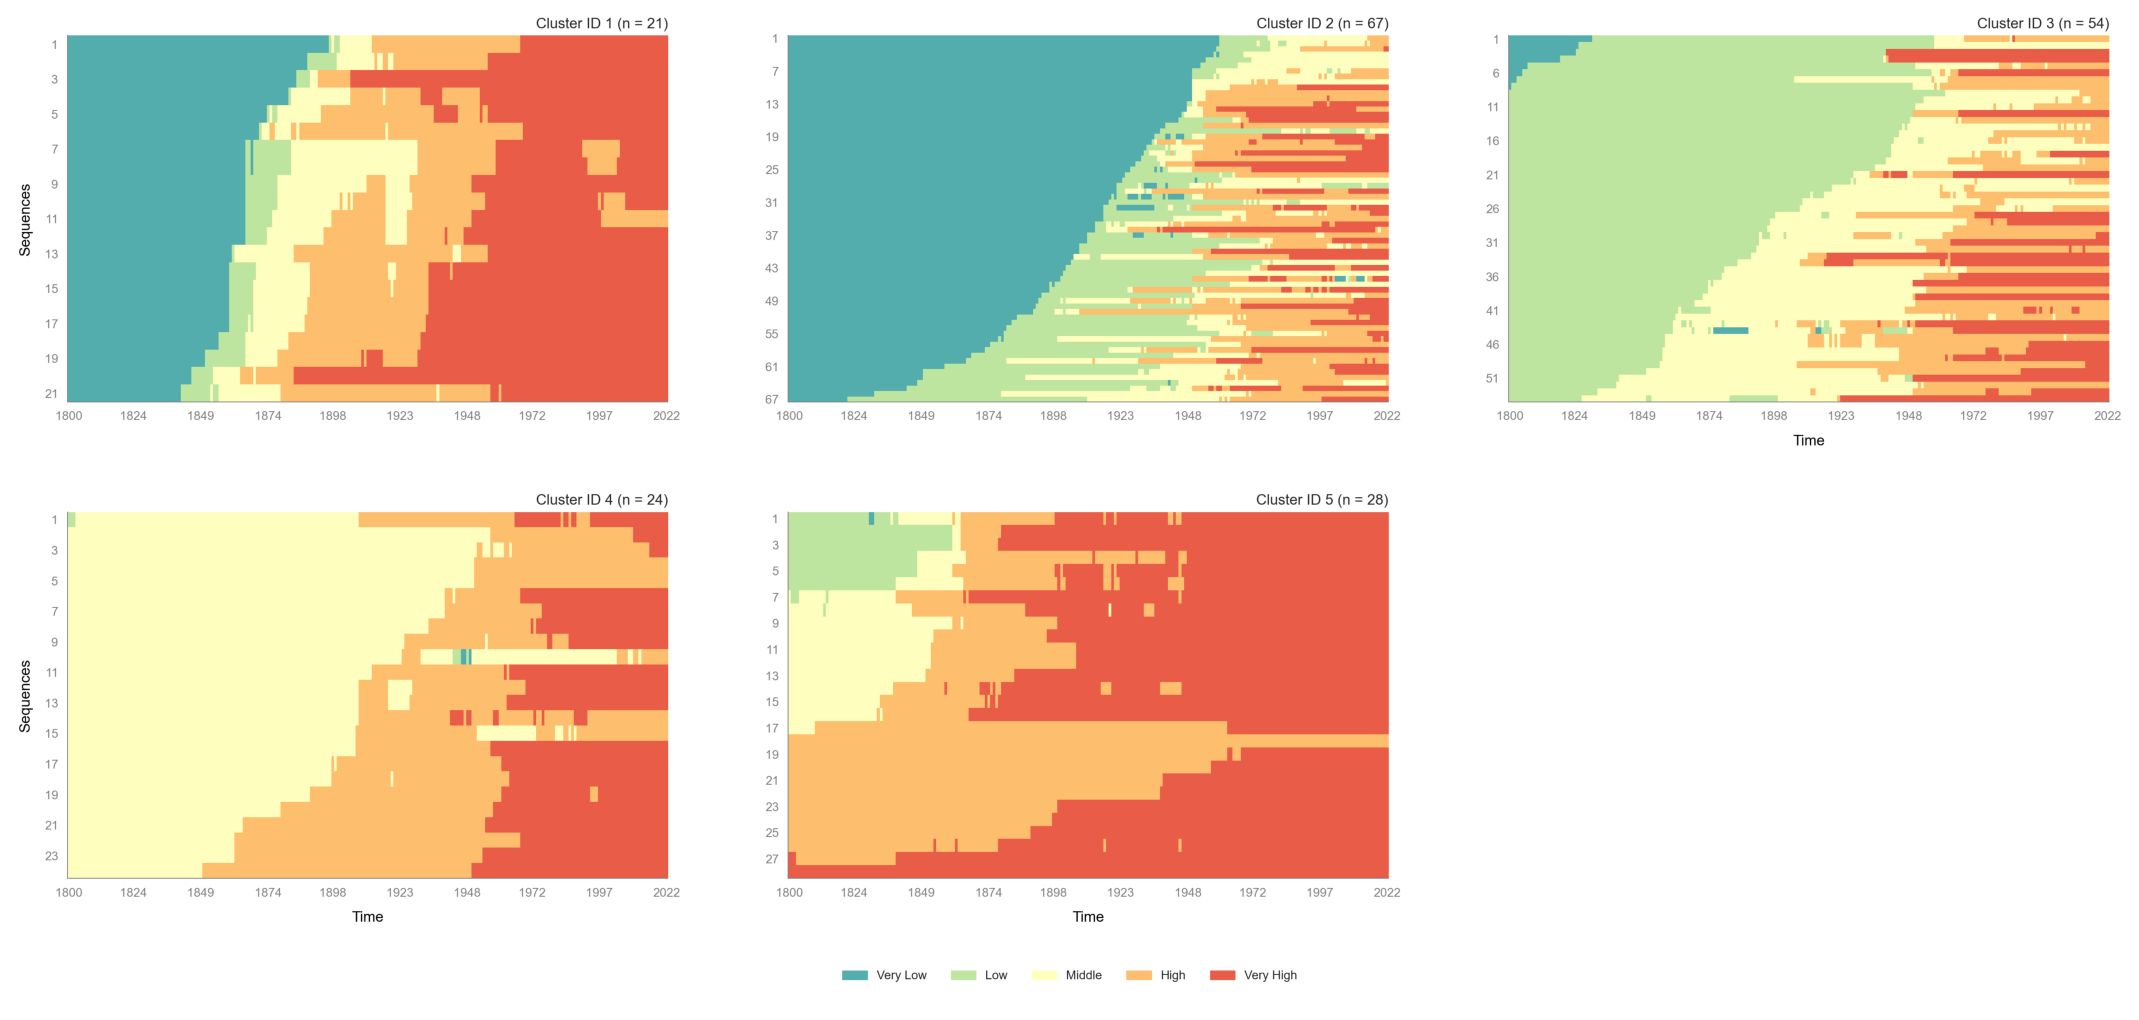

In [17]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    save_as='cluster_index_plot')

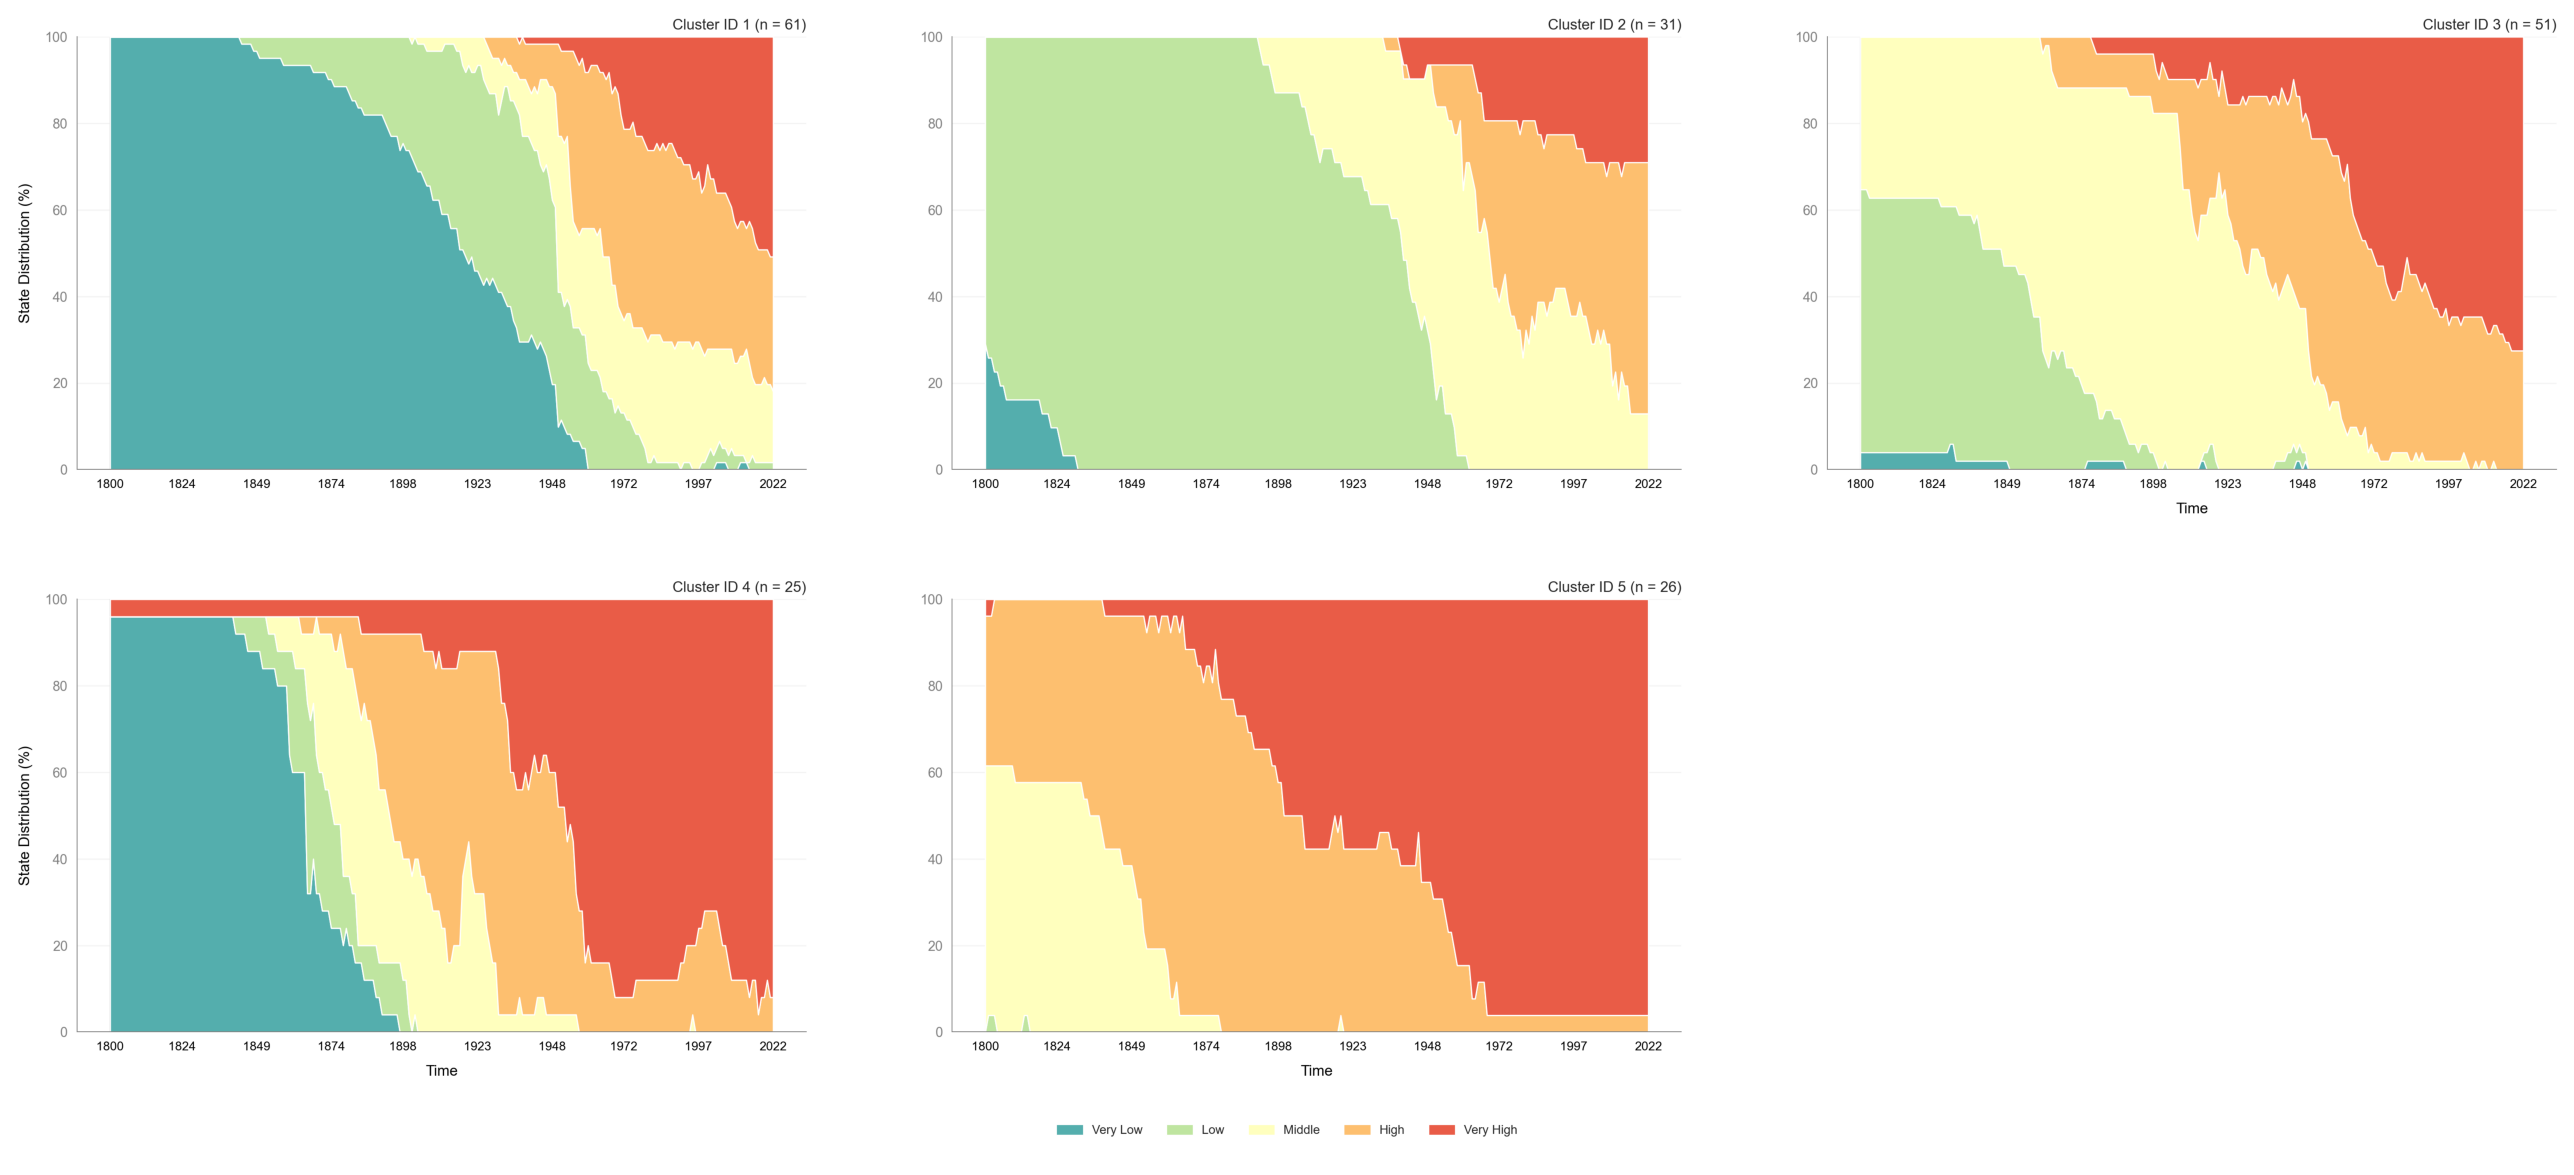

In [17]:
# TODO: why plot_state_distribution cannot be called directly without importing?
# TODO2: state distribution plot much slower than index plot

from sequenzo.visualization import plot_state_distribution

plot_state_distribution(seqdata=sequence_data,
                            id_group_df=membership_table,
                            categories='Cluster ID',
                            save_as='cluster_state_distribution_plot')

## Regression

## Conclusions